### 2 Dimensional Gaussian Fitting Code
#### For use in the Advanced Instrumentation Module

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits
from matplotlib.colors import LogNorm

fits_file = fits.open("C:/Users/phill/OneDrive - University of Lincoln/Year 4 (2024-2025)/Advanced Instrumentation/Telescope/20241126/FITS/Fixed wcs/P 20241126-120804_IMAGE-PROJ01-SUN_01#_01#_fixedwcs.fits")

image_data = fits_file[0].data

# Define the 2D Gaussian function
def gaussian_2d(xy, A, x0, y0, sigma_x, sigma_y):
    x, y = xy
    return A * np.exp(-(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2)))

# Input data: grid of x and y values and corresponding data
x = np.array(np.linspace(0,len(image_data)-1,len(image_data)))
y = np.array(np.linspace(0,len(image_data)-1,len(image_data)))
z = np.array(image_data)

# Flatten the data for curve fitting
x_flat, y_flat = np.meshgrid(x, y)
xy = np.vstack((x_flat.ravel(), y_flat.ravel()))
z_flat = z.ravel()

# Initial guess for fitting parameters
initial_guess = [np.max(z), np.mean(x), np.mean(y), np.std(x), np.std(y)]

# Perform the curve fitting
params, covariance = curve_fit(gaussian_2d, xy, z_flat, p0=initial_guess)

# Extract the fitted parameters
A_fit, x0_fit, y0_fit, sigma_x_fit, sigma_y_fit = params

FWHM_x = np.abs(4*sigma_x_fit*np.sqrt(-0.5*np.log(0.5)))
FWHM_y = np.abs(4*sigma_y_fit*np.sqrt(-0.5*np.log(0.5)))

# Generate a fine grid for plotting the Gaussian surface
x_fine = np.linspace(min(x), max(x), 100)
y_fine = np.linspace(min(y), max(y), 100)
x_fine_grid, y_fine_grid = np.meshgrid(x_fine, y_fine)
z_fit = gaussian_2d((x_fine_grid, y_fine_grid), A_fit, x0_fit, y0_fit, sigma_x_fit, sigma_y_fit)

# Plot the original data and the Gaussian fit
fig1 = plt.figure(figsize=(12, 6))
fig2 = plt.figure(figsize=(12, 6))

# Original data
ax1 = fig1.add_subplot(121, projection='3d')
ax1.plot_surface(x_flat, y_flat, z, edgecolor='k', alpha=0.8)
ax1.set_title("Original Data")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Gaussian fit
ax2 = fig1.add_subplot(122, projection='3d')
ax2.plot_surface(x_fine_grid, y_fine_grid, z_fit, edgecolor='k', alpha=0.8)
ax2.set_title("Gaussian Fit")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

ax3 = fig2.add_subplot(141)
ax3.imshow(image_data)




plt.show()

print(image_data)
# Print the fitted parameters
print(f"Fitted Amplitude (A): {A_fit}")
print(f"Fitted Center x (x0): {x0_fit}")
print(f"Fitted Center y (y0): {y0_fit}")
print(f"Fitted Standard Deviation in x (sigma_x): {sigma_x_fit}")
print(f"Fitted Standard Deviation in y (sigma_y): {sigma_y_fit}")
print(f"FWHM_x: {FWHM_x}")
print(f"FWHM_y: {FWHM_y}")

deconvx = np.sqrt(FWHM_x**2 - np.rad2deg(2*np.arctan(1391400000/(2*149597870000)))**2)
deconvy = np.sqrt(FWHM_y**2 - np.rad2deg(2*np.arctan(1391400000/(2*149597870000)))**2)
print(deconvx)
print(deconvy) 

Data Filling Code

Original Data:
[[10458 10586 10547 10481 10467 10600 10474 10659 10544]
 [10475 10536 10474 10488 10511 10568 10488 10518 10597]
 [10416 10486 10440 10455 10497 10497 10438 10474 10574]
 [10509 10462 10841 11845 11971 11058 10516 10457 10574]
 [10507 10713 12314 15704 15795 12765 10814 10471 10512]
 [10583 10709 12832 15897 16308 12935 10798 10453 10459]
 [10716 10846 11352 12421 12518 11188 10554 10458 10420]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]]

Filled Data:
[[10458 10586 10547 10481 10467 10600 10474 10659 10544]
 [10475 10536 10474 10488 10511 10568 10488 10518 10597]
 [10416 10486 10440 10455 10497 10497 10438 10474 10574]
 [10509 10462 10841 11845 11971 11058 10516 10457 10574]
 [10507 10713 12314 15704 15795 12765 10814 10471 10512]
 [10583 10709 12832 15897 16308 12935 10798 10453 10459]
 [10716 10846 11352 12421 12518 11188 10554 10458 10420]
 [11508  9095 10544  9875 10320 10919 11418  8921 11327]
 

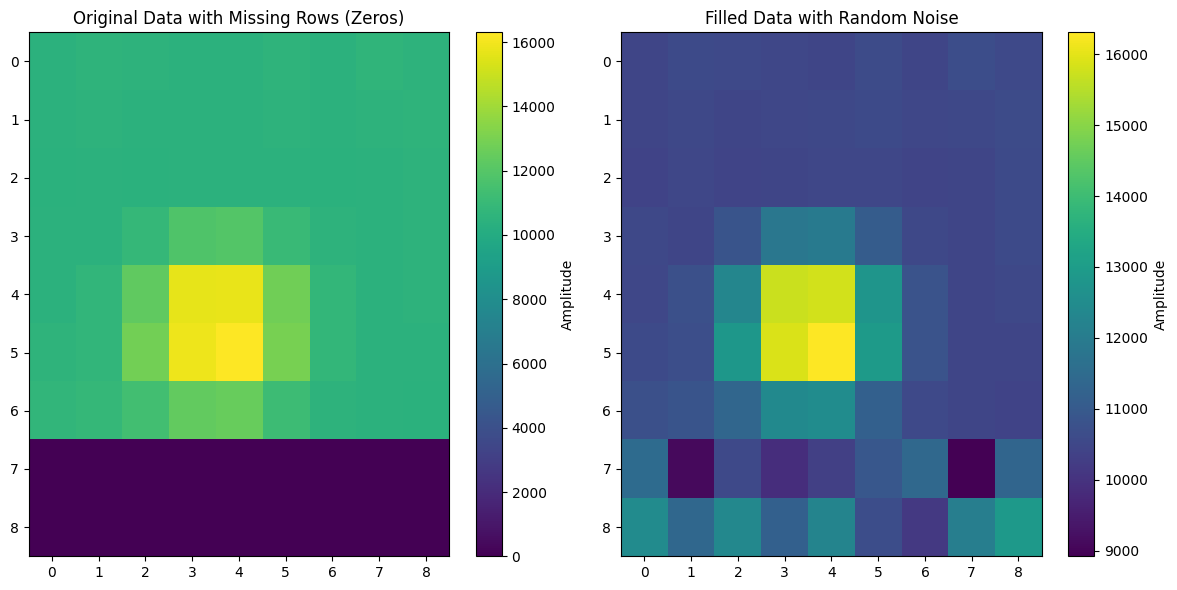

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fill_with_noise(data):
    """
    Fill missing cells (zeros) with random noise based on the existing background noise distribution.
    
    Parameters:
    - data: 2D numpy array with missing values as 0.
    
    Returns:
    - filled_data: 2D numpy array with missing values replaced by random noise.
    """
    filled_data = data.copy()
    
    # Identify background noise (non-zero values)
    values = filled_data[filled_data != 0]
    
    # Compute mean and standard deviation of background noise
    mean = np.mean(values)
    std = np.std(values)
    
    # Fill zeros with random values drawn from the background noise distribution
    ToFill = np.where(filled_data == 0)
    filled_data[ToFill] = np.random.normal(mean, std, size=len(ToFill[0]))
    
    return filled_data

# Example usage
data = image_data

# Apply noise filling
filled_data = fill_with_noise(data)

# Display results
print("Original Data:")
print(data)

print("\nFilled Data:")
print(filled_data)

# Visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data with Missing Rows (Zeros)")
plt.imshow(data, origin='upper', aspect='auto', cmap='viridis')
plt.colorbar(label="Amplitude")

plt.subplot(1, 2, 2)
plt.title("Filled Data with Random Noise")
plt.imshow(filled_data, origin='upper', aspect='auto', cmap='viridis')
plt.colorbar(label="Amplitude")

plt.tight_layout()
plt.show()


Original Data:
[[10458 10586 10547 10481 10467 10600 10474 10659 10544]
 [10475 10536 10474 10488 10511 10568 10488 10518 10597]
 [10416 10486 10440 10455 10497 10497 10438 10474 10574]
 [10509 10462 10841 11845 11971 11058 10516 10457 10574]
 [10507 10713 12314 15704 15795 12765 10814 10471 10512]
 [10583 10709 12832 15897 16308 12935 10798 10453 10459]
 [10716 10846 11352 12421 12518 11188 10554 10458 10420]
 [    0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0]]

Filled Data:
[[10458 10586 10547 10481 10467 10600 10474 10659 10544]
 [10475 10536 10474 10488 10511 10568 10488 10518 10597]
 [10416 10486 10440 10455 10497 10497 10438 10474 10574]
 [10509 10462 10841 11845 11971 11058 10516 10457 10574]
 [10507 10713 12314 15704 15795 12765 10814 10471 10512]
 [10583 10709 12832 15897 16308 12935 10798 10453 10459]
 [10716 10846 11352 12421 12518 11188 10554 10458 10420]
 [10596 10555 10493 10434 10439 10474 10471 10506 10535]
 

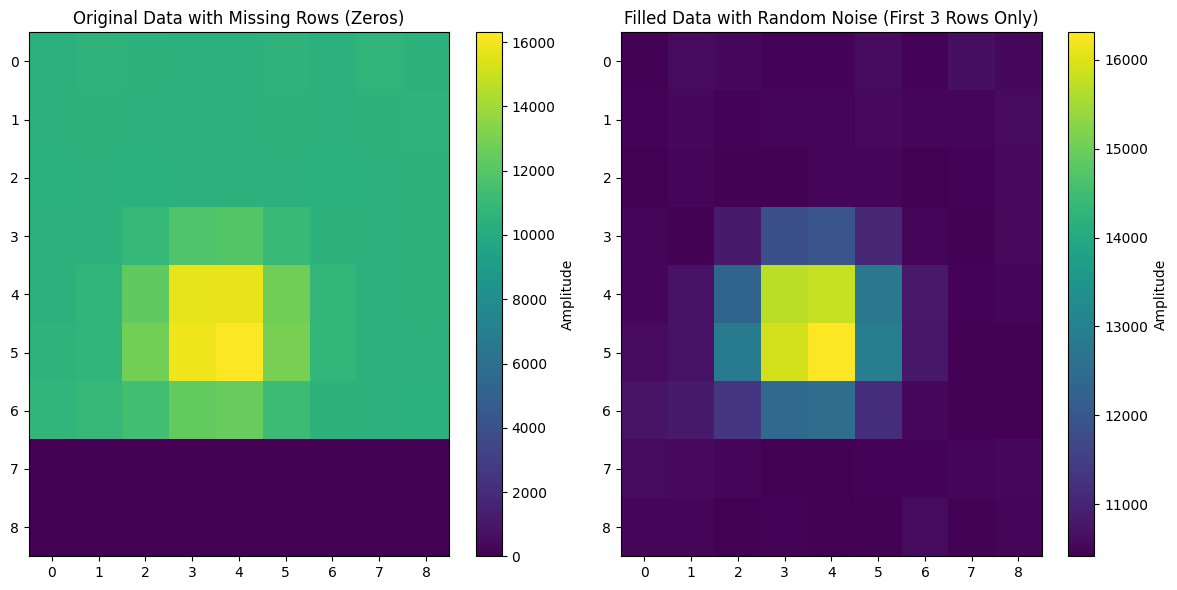

In [ ]:
def DataFill(data):
    filled_data = data.copy()

    # Restrict noise calculation to the first three rows
    source = filled_data[:3, :]  # First three rows
    values = source[source != 0]  # Non-zero values only

    mean = np.mean(values)
    std = np.std(values)

    # Fill zeros with random values drawn from the background noise distribution
    ToFill = np.where(filled_data == 0)
    filled_data[ToFill] = np.random.normal(mean, std, size=len(ToFill[0]))
    
    return filled_data

# Example usage
data = image_data

# Apply noise filling
filled_data = fill_with_noise(data)

# Display results
print("Original Data:")
print(data)

print("\nFilled Data:")
print(filled_data)

# Visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data with Missing Rows (Zeros)")
plt.imshow(data, origin='upper', aspect='auto', cmap='viridis')
plt.colorbar(label="Amplitude")

plt.subplot(1, 2, 2)
plt.title("Filled Data with Random Noise (First 3 Rows Only)")
plt.imshow(filled_data, origin='upper', aspect='auto', cmap='viridis')
plt.colorbar(label="Amplitude")

plt.tight_layout()
plt.show()


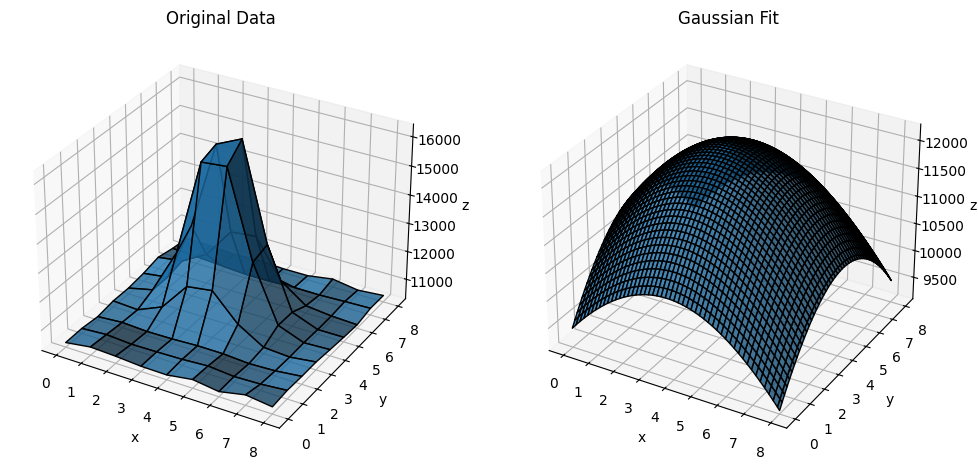

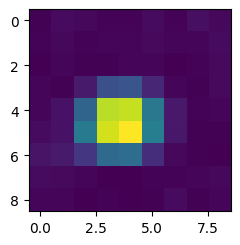

[[10458 10586 10547 10481 10467 10600 10474 10659 10544]
 [10475 10536 10474 10488 10511 10568 10488 10518 10597]
 [10416 10486 10440 10455 10497 10497 10438 10474 10574]
 [10509 10462 10841 11845 11971 11058 10516 10457 10574]
 [10507 10713 12314 15704 15795 12765 10814 10471 10512]
 [10583 10709 12832 15897 16308 12935 10798 10453 10459]
 [10716 10846 11352 12421 12518 11188 10554 10458 10420]
 [10596 10555 10493 10434 10439 10474 10471 10506 10535]
 [10528 10498 10435 10485 10437 10444 10587 10450 10526]]
Fitted Amplitude (A): 12224.305296993973
Fitted Center x (x0): 3.7488425357387563
Fitted Center y (y0): 4.2800258461370255
Fitted Standard Deviation in x (sigma_x): 8.040634640394828
Fitted Standard Deviation in y (sigma_y): 7.840162259710744
FWHM_x: 18.93424762597196
FWHM_y: 18.462171245462002
18.926746954170998
18.454478703078024


In [19]:
image_data = filled_data

# Define the 2D Gaussian function
def gaussian_2d(xy, A, x0, y0, sigma_x, sigma_y):
    x, y = xy
    return A * np.exp(-(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2)))

# Input data: grid of x and y values and corresponding data
x = np.array(np.linspace(0,len(image_data)-1,len(image_data)))
y = np.array(np.linspace(0,len(image_data)-1,len(image_data)))
z = np.array(image_data)

# Flatten the data for curve fitting
x_flat, y_flat = np.meshgrid(x, y)
xy = np.vstack((x_flat.ravel(), y_flat.ravel()))
z_flat = z.ravel()

# Initial guess for fitting parameters
initial_guess = [np.max(z), np.mean(x), np.mean(y), np.std(x), np.std(y)]

# Perform the curve fitting
params, covariance = curve_fit(gaussian_2d, xy, z_flat, p0=initial_guess)

# Extract the fitted parameters
A_fit, x0_fit, y0_fit, sigma_x_fit, sigma_y_fit = params

FWHM_x = np.abs(4*sigma_x_fit*np.sqrt(-0.5*np.log(0.5)))
FWHM_y = np.abs(4*sigma_y_fit*np.sqrt(-0.5*np.log(0.5)))

# Generate a fine grid for plotting the Gaussian surface
x_fine = np.linspace(min(x), max(x), 100)
y_fine = np.linspace(min(y), max(y), 100)
x_fine_grid, y_fine_grid = np.meshgrid(x_fine, y_fine)
z_fit = gaussian_2d((x_fine_grid, y_fine_grid), A_fit, x0_fit, y0_fit, sigma_x_fit, sigma_y_fit)

# Plot the original data and the Gaussian fit
fig1 = plt.figure(figsize=(12, 6))
fig2 = plt.figure(figsize=(12, 6))

# Original data
ax1 = fig1.add_subplot(121, projection='3d')
ax1.plot_surface(x_flat, y_flat, z, edgecolor='k', alpha=0.8)
ax1.set_title("Original Data")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Gaussian fit
ax2 = fig1.add_subplot(122, projection='3d')
ax2.plot_surface(x_fine_grid, y_fine_grid, z_fit, edgecolor='k', alpha=0.8)
ax2.set_title("Gaussian Fit")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

ax3 = fig2.add_subplot(141)
ax3.imshow(image_data)




plt.show()

print(image_data)
# Print the fitted parameters
print(f"Fitted Amplitude (A): {A_fit}")
print(f"Fitted Center x (x0): {x0_fit}")
print(f"Fitted Center y (y0): {y0_fit}")
print(f"Fitted Standard Deviation in x (sigma_x): {sigma_x_fit}")
print(f"Fitted Standard Deviation in y (sigma_y): {sigma_y_fit}")
print(f"FWHM_x: {FWHM_x}")
print(f"FWHM_y: {FWHM_y}")

deconvx = np.sqrt(FWHM_x**2 - np.rad2deg(2*np.arctan(1391400000/(2*149597870000)))**2)
deconvy = np.sqrt(FWHM_y**2 - np.rad2deg(2*np.arctan(1391400000/(2*149597870000)))**2)
print(deconvx)
print(deconvy) 